In [1]:
import math
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
from collections import defaultdict


# Defining the function that predicts the speaker :

In [2]:
def get_scores(mfcc_features, gmm_models):
    scores = {}
    for model_name, gmm_model in gmm_models.items():
        scores[model_name.split(".")[0]] = gmm_model.score(mfcc_features)
    return scores


# Loading all the gmm models and storing them in dictionaries according to the  n_components and gender : 
## key: model_name , value: gmm model 

In [3]:
# Load all GMM models from the appropriate folder
model_folder = r'C:\Users\ASUS ROG STRIX\Desktop\Projet\RAL\GMM\H'
gmm_models_H_128 = {}
gmm_models_H_256 = {}
gmm_models_H_512 = {}
gmm_models_H_1024 = {}
for model_filename in os.listdir(model_folder):
    model_path = os.path.join(model_folder, model_filename)
    gmm_model = joblib.load(model_path)
    if model_filename.endswith(".128.gmm"):
        gmm_models_H_128[model_filename] = gmm_model
    elif model_filename.endswith(".256.gmm"):
        gmm_models_H_256[model_filename] = gmm_model
    elif model_filename.endswith(".512.gmm"):
        gmm_models_H_512[model_filename] = gmm_model
    elif model_filename.endswith(".1024.gmm"):
        gmm_models_H_1024[model_filename] = gmm_model



In [4]:
# Load all GMM models from the appropriate folder
model_folder = r'C:\Users\ASUS ROG STRIX\Desktop\Projet\RAL\GMM\F'
gmm_models_F_128 = {}
gmm_models_F_256 = {}
gmm_models_F_512 = {}
gmm_models_F_1024 = {}
for model_filename in os.listdir(model_folder):
    model_path = os.path.join(model_folder, model_filename)
    gmm_model = joblib.load(model_path)
    if model_filename.endswith(".128.gmm"):
        gmm_models_F_128[model_filename] = gmm_model
    elif model_filename.endswith(".256.gmm"):
        gmm_models_F_256[model_filename] = gmm_model
    elif model_filename.endswith(".512.gmm"):
        gmm_models_F_512[model_filename] = gmm_model
    elif model_filename.endswith(".1024.gmm"):
        gmm_models_F_1024[model_filename] = gmm_model

In [5]:
gmm_models_F_128

{'F1.128.gmm': GaussianMixture(n_components=128),
 'F10.128.gmm': GaussianMixture(n_components=128),
 'F2.128.gmm': GaussianMixture(n_components=128),
 'F3.128.gmm': GaussianMixture(n_components=128),
 'F4.128.gmm': GaussianMixture(n_components=128),
 'F5.128.gmm': GaussianMixture(n_components=128),
 'F6.128.gmm': GaussianMixture(n_components=128),
 'F7.128.gmm': GaussianMixture(n_components=128),
 'F8.128.gmm': GaussianMixture(n_components=128),
 'F9.128.gmm': GaussianMixture(n_components=128)}

# Loading the files containing the mfcc features and storing them in dictionaries according to duration and gender:
## key: file_name , value: mfcc_features

In [6]:
# Set the path to the test folder
test_folder = r'C:\Users\ASUS ROG STRIX\Desktop\Projet\RAL\MFCC\Test-segments'

# Initialize dictionaries to store the loaded test files
test_files_3_H = {}
test_files_3_F = {}
test_files_10_H = {}
test_files_10_F = {}
test_files_15_H = {}
test_files_15_F = {}
test_files_30_H = {}
test_files_30_F = {}

# Set the duration sub-folders
duration_folders = ["3", "10", "15", "30"]

for duration_folder in duration_folders:
    duration_folder_path = os.path.join(test_folder, duration_folder)

    # Check if the duration sub-folder exists
    if os.path.isdir(duration_folder_path):
        # Iterate over the gender sub-folders
        for gender_folder in os.listdir(duration_folder_path):
            gender_folder_path = os.path.join(duration_folder_path, gender_folder)

            # Check if the item in the duration sub-folder is a directory
            if os.path.isdir(gender_folder_path):
                # Determine the appropriate dictionary based on duration and gender
                if duration_folder == "3" and gender_folder == "H":
                    test_files_dict = test_files_3_H
                elif duration_folder == "3" and gender_folder == "F":
                    test_files_dict = test_files_3_F
                elif duration_folder == "10" and gender_folder == "H":
                    test_files_dict = test_files_10_H
                elif duration_folder == "10" and gender_folder == "F":
                    test_files_dict = test_files_10_F
                elif duration_folder == "15" and gender_folder == "H":
                    test_files_dict = test_files_15_H
                elif duration_folder == "15" and gender_folder == "F":
                    test_files_dict = test_files_15_F
                elif duration_folder == "30" and gender_folder == "H":
                    test_files_dict = test_files_30_H
                elif duration_folder == "30" and gender_folder == "F":
                    test_files_dict = test_files_30_F

                # Iterate over the test segments within the gender sub-folder
                for filename in os.listdir(gender_folder_path):
                    if filename.endswith(".mfcc"):
                        test_segment_path = os.path.join(gender_folder_path, filename)

                        # Load the MFCC features
                        mfcc_features = np.genfromtxt(test_segment_path, delimiter=',')

                        # Add the loaded features to the corresponding dictionary with the filename as the key
                        test_files_dict[filename] = mfcc_features


# Plotting the DET curve:


## a. GMM 128 :
### 3 second segments :


## Get the scores :

In [7]:
results_3_H_128 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_3_H.items():
    score = get_scores(test_segment, gmm_models_H_128)
    results_3_H_128.append((test_segment_name, score))

# Printing the results
for result in results_3_H_128:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")


File: H1.3.1.mfcc ,Score: {'H1': -55.526226112216584, 'H2': -838.2302116671582, 'H4': -1045.881435599579, 'H5': -986.133520223482, 'H6': -491.55823286589475, 'H7': -112.94209732840002, 'H8': -80.71625181373366, 'H9': -81.70364101649275}
File: H1.3.10.mfcc ,Score: {'H1': -53.5739810308537, 'H2': -833.8396028499087, 'H4': -995.1653430922647, 'H5': -1283.7600488051478, 'H6': -438.62739410812, 'H7': -112.70292415250549, 'H8': -75.89826755760477, 'H9': -80.96292508537019}
File: H1.3.11.mfcc ,Score: {'H1': -55.69454835129535, 'H2': -708.5837097872978, 'H4': -1034.7587575257921, 'H5': -864.2159814745852, 'H6': -464.83789499009515, 'H7': -106.07901438666508, 'H8': -77.16378185867453, 'H9': -85.04545695747659}
File: H1.3.12.mfcc ,Score: {'H1': -56.95923004469761, 'H2': -619.179171830634, 'H4': -1013.3802750619644, 'H5': -870.2684519878901, 'H6': -420.39877866053826, 'H7': -105.7611087146396, 'H8': -70.78540298262126, 'H9': -84.49641879212511}
File: H1.3.13.mfcc ,Score: {'H1': -62.77456782850709

## Sort the scores :

In [8]:
scores = [score for _, score in results_3_H_128]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)

# Plot DET curve :

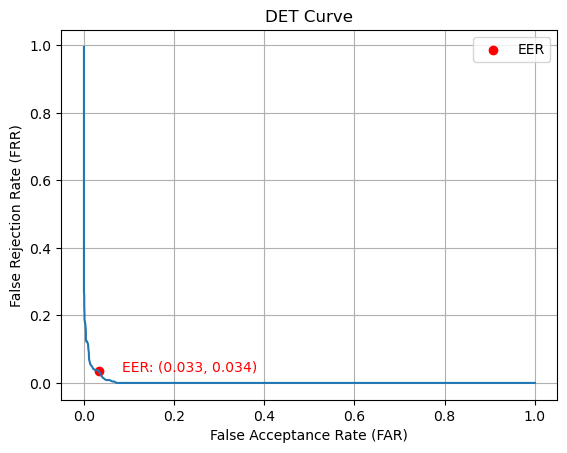

In [9]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_3_H_128:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


## 10 seconds segments :

### Get the scores 

In [10]:
results_10_H_128 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_10_H.items():
    score = get_scores(test_segment, gmm_models_H_128)
    results_10_H_128.append((test_segment_name, score))

# Printing the results
for result in results_10_H_128:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")




File: H1.10.1.mfcc ,Score: {'H1': -56.48663751140208, 'H2': -841.9754924336526, 'H4': -1086.041451187642, 'H5': -1130.5730636645271, 'H6': -461.6490276860664, 'H7': -113.97866860313582, 'H8': -79.13617443953659, 'H9': -83.68266805740426}
File: H1.10.2.mfcc ,Score: {'H1': -56.02306196049102, 'H2': -776.9387892744, 'H4': -947.8083638518013, 'H5': -1107.5194542062281, 'H6': -452.55255628149735, 'H7': -109.13601534506695, 'H8': -77.98510135391263, 'H9': -86.31849926407682}
File: H1.10.3.mfcc ,Score: {'H1': -55.12729105661597, 'H2': -835.1087605449322, 'H4': -1043.7165039045894, 'H5': -1186.848974902858, 'H6': -457.2880540462707, 'H7': -111.34077718967775, 'H8': -77.45642801606348, 'H9': -86.14446603679453}
File: H1.10.4.mfcc ,Score: {'H1': -57.97030282068416, 'H2': -622.5347566849485, 'H4': -1169.3061680465435, 'H5': -1076.777427425177, 'H6': -455.85273352804126, 'H7': -106.82413462381798, 'H8': -73.71078021741755, 'H9': -87.89701182947815}
File: H1.10.5.mfcc ,Score: {'H1': -53.86961488073

## Sort the scores :

In [11]:
scores = [score for _, score in results_10_H_128]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)

## Plot DET curve

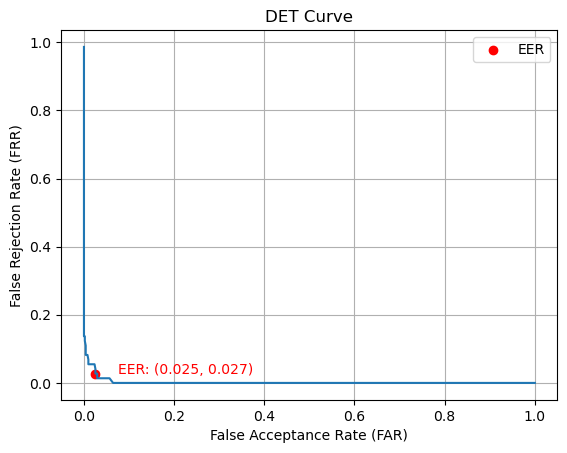

In [12]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_10_H_128:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 15 seconds segments :

## Get the scores

In [13]:
results_15_H_128 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_15_H.items():
    score = get_scores(test_segment, gmm_models_H_128)
    results_15_H_128.append((test_segment_name, score))

# Printing the results
for result in results_15_H_128:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.15.1.mfcc ,Score: {'H1': -56.475372771446594, 'H2': -819.3227869357845, 'H4': -1100.0080733610193, 'H5': -1154.7660784304016, 'H6': -461.8390513784854, 'H7': -113.0716836794127, 'H8': -78.95826587387165, 'H9': -85.8029775566225}
File: H1.15.2.mfcc ,Score: {'H1': -55.28262091422611, 'H2': -816.6925745662055, 'H4': -951.7028059350025, 'H5': -1128.5282500853405, 'H6': -452.4873739640709, 'H7': -109.898623745841, 'H8': -77.42686999913683, 'H9': -84.96077801556126}
File: H1.15.3.mfcc ,Score: {'H1': -56.67452694328957, 'H2': -637.7556063720523, 'H4': -1094.3264617574941, 'H5': -1009.0054125743915, 'H6': -449.7482868775287, 'H7': -105.54601952974205, 'H8': -73.41464801388351, 'H9': -84.69206880000536}
File: H1.15.4.mfcc ,Score: {'H1': -55.98678840814407, 'H2': -817.9592937151834, 'H4': -786.0716814521849, 'H5': -1021.1792652371984, 'H6': -515.2658804766913, 'H7': -112.71723017050317, 'H8': -82.51293271022556, 'H9': -88.96355744395193}
File: H2.15.1.mfcc ,Score: {'H1': -80.83126631594

## Sort the scores 

In [14]:
# Extract the scores from results_15_H_128
scores = [score for _, score in results_15_H_128]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve 

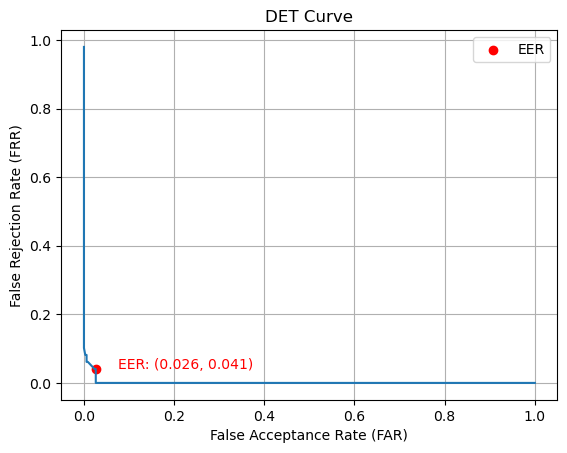

In [15]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_15_H_128:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 30 seconds segments :

## Get the scores

In [16]:
results_30_H_128 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_30_H.items():
    score = get_scores(test_segment, gmm_models_H_128)
    results_30_H_128.append((test_segment_name, score))

# Printing the results
for result in results_30_H_128:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.30.1.mfcc ,Score: {'H1': -55.87899684283636, 'H2': -818.007680750995, 'H4': -1025.855439648011, 'H5': -1141.647164257871, 'H6': -457.1632126712782, 'H7': -111.48515371262685, 'H8': -78.19256793650425, 'H9': -85.38187778609188}
File: H1.30.2.mfcc ,Score: {'H1': -56.45719780290843, 'H2': -694.7009576391704, 'H4': -996.9162644243528, 'H5': -1012.8524166306273, 'H6': -470.4522049642683, 'H7': -107.81216133277327, 'H8': -76.28975576334315, 'H9': -86.04188258489135}
File: H2.30.1.mfcc ,Score: {'H1': -79.79307377515221, 'H2': -53.455559120385885, 'H4': -1214.2236622711223, 'H5': -2117.491771642024, 'H6': -556.1225282879748, 'H7': -103.08059789162199, 'H8': -75.02464517865732, 'H9': -116.75510879528538}
File: H2.30.2.mfcc ,Score: {'H1': -80.32072102905506, 'H2': -52.758465695057915, 'H4': -1206.1919484118312, 'H5': -2095.546271647103, 'H6': -563.4277982575616, 'H7': -102.10238386504663, 'H8': -75.53660198035813, 'H9': -115.58738450146203}
File: H4.30.1.mfcc ,Score: {'H1': -140.1222876

## Sort the scores 

In [17]:
# Extract the scores from results_30_H_128
scores = [score for _, score in results_30_H_128]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve

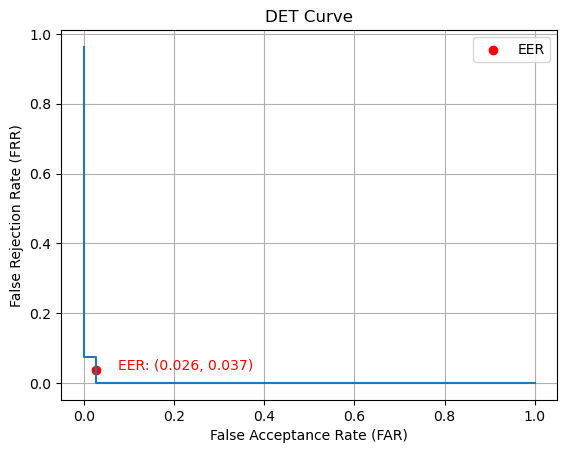

In [18]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_30_H_128:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


## b. GMM 256:
### 3 seconds segments :

## Get scores

In [19]:
results_3_H_256 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_3_H.items():
    score = get_scores(test_segment, gmm_models_H_256)
    results_3_H_256.append((test_segment_name, score))

# Printing the results
for result in results_3_H_256:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.3.1.mfcc ,Score: {'H1': -62.20238465509331, 'H2': -1098.978390841226, 'H4': -1118.1852647536277, 'H5': -1112.7576815864436, 'H6': -702.9840148302679, 'H7': -117.07558476592848, 'H8': -105.21697754073107, 'H9': -104.61214680593822}
File: H1.3.10.mfcc ,Score: {'H1': -59.43610022240866, 'H2': -1101.0314125070786, 'H4': -1027.6650160389763, 'H5': -1437.8498917008483, 'H6': -664.2662118581604, 'H7': -129.2390537900892, 'H8': -92.39608405184755, 'H9': -101.28197499299496}
File: H1.3.11.mfcc ,Score: {'H1': -63.28465537189639, 'H2': -982.3655503027832, 'H4': -1074.4071689032487, 'H5': -963.4817235089315, 'H6': -643.2247545643265, 'H7': -115.91009922520594, 'H8': -93.42950590521693, 'H9': -110.30303394159135}
File: H1.3.12.mfcc ,Score: {'H1': -64.43970843739294, 'H2': -879.4125857411965, 'H4': -1085.8066915642808, 'H5': -1062.2783181267823, 'H6': -627.7479318014491, 'H7': -120.99781120643995, 'H8': -87.48504180783537, 'H9': -103.11651007354686}
File: H1.3.13.mfcc ,Score: {'H1': -74.498

## Sort the scores

In [20]:
# Extract the scores from results_3_H_128
scores = [score for _, score in results_3_H_256]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve

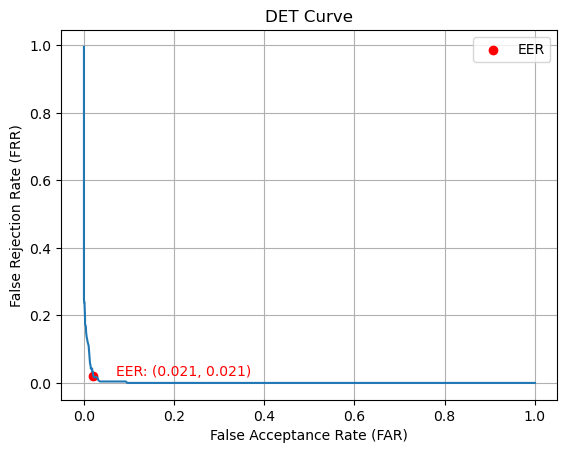

In [21]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_3_H_256:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 10 seconds segments :

## Get scores

In [22]:
results_10_H_256 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_10_H.items():
    score = get_scores(test_segment, gmm_models_H_256)
    results_10_H_256.append((test_segment_name, score))

# Printing the results
for result in results_10_H_256:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.10.1.mfcc ,Score: {'H1': -63.52331114458659, 'H2': -1139.1668690650984, 'H4': -1148.7020666293258, 'H5': -1266.5341448275312, 'H6': -687.7710209458592, 'H7': -125.56715138610528, 'H8': -102.39143922199652, 'H9': -102.21099774875032}
File: H1.10.2.mfcc ,Score: {'H1': -63.06458564231549, 'H2': -1120.3850234074662, 'H4': -1006.5297589307413, 'H5': -1280.3543471559863, 'H6': -648.3982120295742, 'H7': -122.72529875033678, 'H8': -99.78095450432387, 'H9': -102.24948303419035}
File: H1.10.3.mfcc ,Score: {'H1': -62.24750247667267, 'H2': -1114.3733642276616, 'H4': -1093.6342750775661, 'H5': -1348.6405435721897, 'H6': -670.8908301413902, 'H7': -124.28796144135329, 'H8': -96.68779668658057, 'H9': -106.76265468196694}
File: H1.10.4.mfcc ,Score: {'H1': -66.48419129003997, 'H2': -862.3074321932035, 'H4': -1244.5997485293276, 'H5': -1276.4882487390466, 'H6': -637.939379991741, 'H7': -124.71688577123109, 'H8': -89.99408117433848, 'H9': -108.22674437304335}
File: H1.10.5.mfcc ,Score: {'H1': -62

## Sort the scores 

In [23]:
# Extract the scores from results_3_H_128
scores = [score for _, score in results_10_H_256]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve 

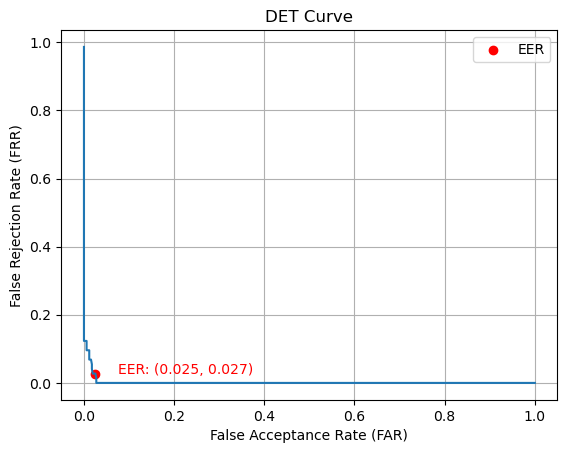

In [24]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_10_H_256:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 15 seconds segments :

## Get the scores 

In [25]:
results_15_H_256 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_15_H.items():
    score = get_scores(test_segment, gmm_models_H_256)
    results_15_H_256.append((test_segment_name, score))

# Printing the results
for result in results_15_H_256:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.15.1.mfcc ,Score: {'H1': -63.34187849617921, 'H2': -1123.1624589476164, 'H4': -1157.3033599737396, 'H5': -1304.467302620167, 'H6': -683.4180221522328, 'H7': -124.70885661877561, 'H8': -102.21446923097089, 'H9': -104.01340597168375}
File: H1.15.2.mfcc ,Score: {'H1': -62.54838767953729, 'H2': -1126.121045519201, 'H4': -1008.6073737846829, 'H5': -1292.5520544169713, 'H6': -654.6220199256496, 'H7': -123.67808443308795, 'H8': -97.02565771096309, 'H9': -103.46868433825465}
File: H1.15.3.mfcc ,Score: {'H1': -64.8395282426553, 'H2': -899.8403193893985, 'H4': -1164.192009964093, 'H5': -1186.1923807573946, 'H6': -623.9021246628848, 'H7': -124.06532728553839, 'H8': -89.76420022808992, 'H9': -103.67339130190192}
File: H1.15.4.mfcc ,Score: {'H1': -66.72920377848523, 'H2': -1081.345363061604, 'H4': -844.5327700163593, 'H5': -1200.6961687218995, 'H6': -659.0885992567398, 'H7': -127.71137958631762, 'H8': -104.57869767841879, 'H9': -109.42581952850034}
File: H2.15.1.mfcc ,Score: {'H1': -89.312

## Sort the scores 

In [26]:
# Extract the scores from results_15_H_256
scores = [score for _, score in results_15_H_256]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)

# Print the sorted array
print(sorted_scores_array)

[-4.34639180e+04 -4.15868337e+04 -4.10195194e+04 -3.92098087e+04
 -3.74188804e+04 -1.88677939e+04 -1.79201259e+04 -1.75549960e+04
 -1.65936688e+04 -1.59313177e+04 -1.55435812e+04 -1.49616199e+04
 -1.42012993e+04 -1.39377494e+04 -1.38661190e+04 -5.53670813e+03
 -5.23686732e+03 -5.08071651e+03 -5.04607500e+03 -3.23668271e+03
 -3.13724241e+03 -2.99657782e+03 -2.95157803e+03 -2.93641222e+03
 -2.92938433e+03 -2.90312372e+03 -2.88884778e+03 -2.88245981e+03
 -2.79613303e+03 -2.75548103e+03 -2.75120904e+03 -2.74450948e+03
 -2.73074374e+03 -2.72592987e+03 -2.66120955e+03 -2.65790462e+03
 -2.64965071e+03 -2.64889252e+03 -2.64834505e+03 -2.62405456e+03
 -2.55848528e+03 -2.46161649e+03 -2.46072844e+03 -2.38624704e+03
 -2.35367581e+03 -2.29315099e+03 -2.25881200e+03 -2.24827961e+03
 -2.22335819e+03 -2.17755292e+03 -2.14296094e+03 -2.12096035e+03
 -2.11028684e+03 -2.10871565e+03 -2.09743592e+03 -2.07019766e+03
 -2.06523132e+03 -1.98144005e+03 -1.98039936e+03 -1.96632765e+03
 -1.93191248e+03 -1.86570

## Plot the Det curve

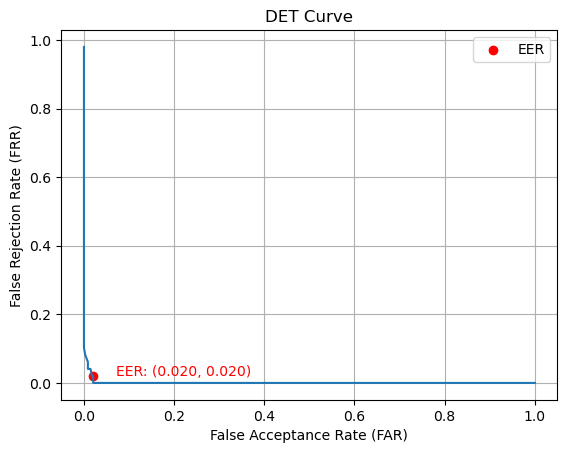

In [27]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_15_H_256:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 30 seconds segments :

## Get the scores 

In [28]:
results_30_H_256 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_30_H.items():
    score = get_scores(test_segment, gmm_models_H_256)
    results_30_H_256.append((test_segment_name, score))

# Printing the results
for result in results_30_H_256:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.30.1.mfcc ,Score: {'H1': -62.945133087858245, 'H2': -1124.6417522334086, 'H4': -1082.9553668792112, 'H5': -1298.509678518569, 'H6': -669.0200210389412, 'H7': -124.19347052593179, 'H8': -99.620063470967, 'H9': -103.74104515496919}
File: H1.30.2.mfcc ,Score: {'H1': -65.43667605219937, 'H2': -957.1969063774691, 'H4': -1063.1779409792414, 'H5': -1190.775657118271, 'H6': -635.0212431733917, 'H7': -125.2174997636232, 'H8': -94.44566248667537, 'H9': -105.49119009854246}
File: H2.30.1.mfcc ,Score: {'H1': -89.1492306685353, 'H2': -65.66414603321142, 'H4': -1459.8649887296344, 'H5': -2708.3452885060615, 'H6': -776.666923187209, 'H7': -128.61376103868932, 'H8': -85.51887251008914, 'H9': -122.6383892842338}
File: H2.30.2.mfcc ,Score: {'H1': -89.29118874970845, 'H2': -64.96268891163186, 'H4': -1418.0626095611906, 'H5': -2675.0772549624717, 'H6': -784.5453331077503, 'H7': -128.23298151744754, 'H8': -84.64114231361171, 'H9': -122.49776334501507}
File: H4.30.1.mfcc ,Score: {'H1': -168.7651177

## Sort the scores

In [29]:
# Extract the scores from results_30_H_256
scores = [score for _, score in results_30_H_256]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve 

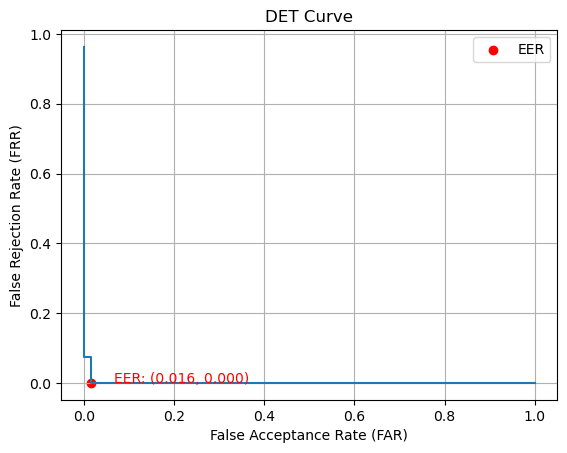

In [30]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_30_H_256:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


## c. GMM 512:
### 3 seconds segments :

## Get the scores

In [31]:
results_3_H_512 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_3_H.items():
    score = get_scores(test_segment, gmm_models_H_512)
    results_3_H_512.append((test_segment_name, score))

# Printing the results
for result in results_3_H_512:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.3.1.mfcc ,Score: {'H1': -95.98332405556857, 'H2': -1380.4300232871474, 'H4': -1368.8744086900535, 'H5': -1555.4574882696513, 'H6': -2822.326300529728, 'H7': -171.9160975738832, 'H8': -152.01476598611382, 'H9': -155.0816118322816}
File: H1.3.10.mfcc ,Score: {'H1': -89.5086913763654, 'H2': -1363.5288400256786, 'H4': -1258.8580399945467, 'H5': -1830.5109207368837, 'H6': -2580.2134497094257, 'H7': -184.34023484431916, 'H8': -144.55830941459888, 'H9': -157.49100940042223}
File: H1.3.11.mfcc ,Score: {'H1': -92.8437231485725, 'H2': -1251.1327203722274, 'H4': -1276.9659916096593, 'H5': -1380.8693626104857, 'H6': -2294.1069309218165, 'H7': -165.119865978246, 'H8': -138.88924856532006, 'H9': -169.68145144948627}
File: H1.3.12.mfcc ,Score: {'H1': -96.54890350310151, 'H2': -1131.2651290917809, 'H4': -1328.9972014998466, 'H5': -1409.274434546235, 'H6': -2330.9728662898647, 'H7': -173.28231664490673, 'H8': -129.87529924443342, 'H9': -167.94720300073664}
File: H1.3.13.mfcc ,Score: {'H1': -12

## Sort the scores

In [32]:
# Extract the scores from results_3_H_512
scores = [score for _, score in results_3_H_512]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)

# Print the sorted array
print(sorted_scores_array)

[-6.11411326e+04 -5.81496344e+04 -5.72944702e+04 ... -3.60210901e+01
 -3.57115719e+01 -3.49458515e+01]


## Plot the DET curve 

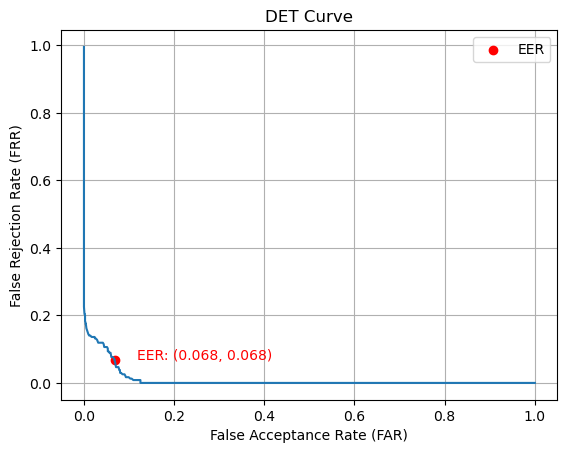

In [33]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_3_H_512:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 10 seconds segments :

## Get the scores

In [34]:
results_10_H_512 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_10_H.items():
    score = get_scores(test_segment, gmm_models_H_512)
    results_10_H_512.append((test_segment_name, score))

# Printing the results
for result in results_10_H_512:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.10.1.mfcc ,Score: {'H1': -97.02274894646006, 'H2': -1348.2008302282584, 'H4': -1351.6463393929853, 'H5': -1789.229595896054, 'H6': -2698.240345580841, 'H7': -176.0430251795563, 'H8': -151.3393084373574, 'H9': -155.35232847148885}
File: H1.10.2.mfcc ,Score: {'H1': -95.59519168362365, 'H2': -1353.1938878673366, 'H4': -1164.5353481603781, 'H5': -1816.6942125616288, 'H6': -2454.689720601678, 'H7': -165.81508243499167, 'H8': -144.28845676243964, 'H9': -166.11185953020876}
File: H1.10.3.mfcc ,Score: {'H1': -94.32145458742819, 'H2': -1302.2637112980196, 'H4': -1300.9043060277945, 'H5': -1790.725774225718, 'H6': -2499.6512452539055, 'H7': -173.0363153076885, 'H8': -141.27876255043492, 'H9': -169.56485944970174}
File: H1.10.4.mfcc ,Score: {'H1': -102.27861497253294, 'H2': -1087.0233017091812, 'H4': -1485.0200949630475, 'H5': -1756.0683185500648, 'H6': -2328.1039277457758, 'H7': -172.18643864010386, 'H8': -130.79961354893635, 'H9': -180.07759893294738}
File: H1.10.5.mfcc ,Score: {'H1': 

## Sort the scores 

In [35]:
# Extract the scores from results_10_H_512
scores = [score for _, score in results_10_H_512]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the curve 

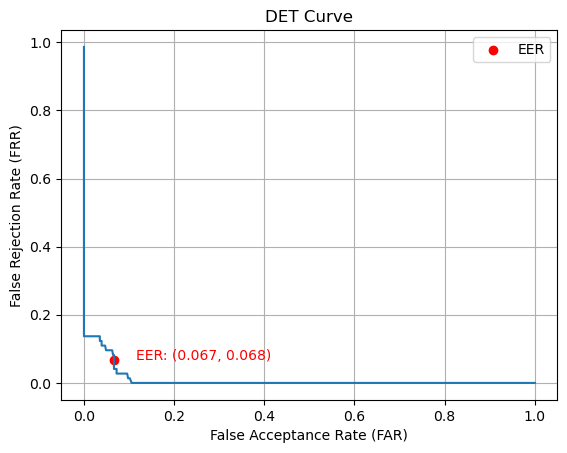

In [36]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_10_H_512:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 15 seconds segments :

## Get the scores

In [37]:
results_15_H_512 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_15_H.items():
    score = get_scores(test_segment, gmm_models_H_512)
    results_15_H_512.append((test_segment_name, score))

# Printing the results
for result in results_15_H_512:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.15.1.mfcc ,Score: {'H1': -96.88107235708254, 'H2': -1324.0586585487897, 'H4': -1346.3489694605832, 'H5': -1833.9035158774489, 'H6': -2653.819694729451, 'H7': -171.195134636056, 'H8': -149.18896908012943, 'H9': -164.33416359425183}
File: H1.15.2.mfcc ,Score: {'H1': -94.41185778792536, 'H2': -1345.0469610469534, 'H4': -1198.3750262601886, 'H5': -1763.8628725781518, 'H6': -2447.901179561499, 'H7': -172.0678139787683, 'H8': -142.0820494200252, 'H9': -163.01853470668104}
File: H1.15.3.mfcc ,Score: {'H1': -98.22875250437784, 'H2': -1161.3840288939014, 'H4': -1392.5342552681807, 'H5': -1610.5876788832688, 'H6': -2250.934333775317, 'H7': -173.24347172611172, 'H8': -130.58563735560858, 'H9': -169.18778602599372}
File: H1.15.4.mfcc ,Score: {'H1': -104.8275402970353, 'H2': -1396.2986580711788, 'H4': -980.0028773249568, 'H5': -1765.9654581178686, 'H6': -2674.1458154704883, 'H7': -177.97699349889675, 'H8': -153.24477109366288, 'H9': -174.4441405990339}
File: H2.15.1.mfcc ,Score: {'H1': -15

## Sort the scores

In [38]:
# Extract the scores from results_15_H_512
scores = [score for _, score in results_15_H_512]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


##  Plot the DET curve 

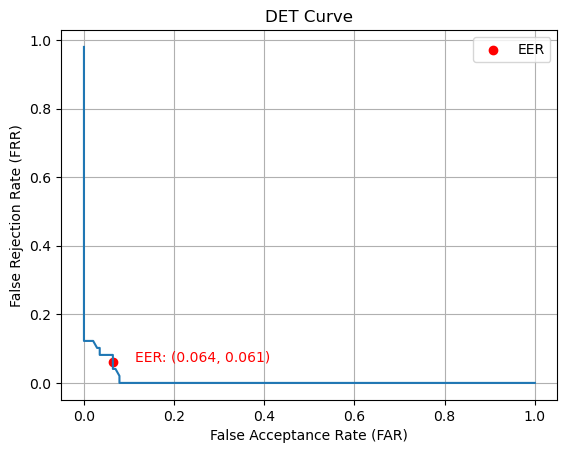

In [39]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_15_H_512:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 30 seconds segments :

## Get the scores

In [40]:
results_30_H_512 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_30_H.items():
    score = get_scores(test_segment, gmm_models_H_512)
    results_30_H_512.append((test_segment_name, score))

# Printing the results
for result in results_30_H_512:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.30.1.mfcc ,Score: {'H1': -95.64646507250396, 'H2': -1334.5528097978715, 'H4': -1272.361997860386, 'H5': -1798.8831942278005, 'H6': -2550.8604371454753, 'H7': -171.63147430741216, 'H8': -145.63550925007732, 'H9': -163.67634915046642}
File: H1.30.2.mfcc ,Score: {'H1': -100.31400555513552, 'H2': -1235.6183371564885, 'H4': -1262.1720824844806, 'H5': -1659.6879073418086, 'H6': -2384.6714777856923, 'H7': -174.7392905079357, 'H8': -137.74604760662166, 'H9': -170.84882283361654}
File: H2.30.1.mfcc ,Score: {'H1': -153.75877184281356, 'H2': -96.02929311051741, 'H4': -1458.5758697162566, 'H5': -4045.7932058746765, 'H6': -2568.783465080277, 'H7': -163.59989696186858, 'H8': -117.22120301294134, 'H9': -244.4248418726468}
File: H2.30.2.mfcc ,Score: {'H1': -152.57999155887862, 'H2': -98.79091519155358, 'H4': -1387.4303163941815, 'H5': -4044.19788669576, 'H6': -2658.58092374119, 'H7': -165.09870245351945, 'H8': -117.00012817746288, 'H9': -243.35487326658858}
File: H4.30.1.mfcc ,Score: {'H1': -

## Sort the scores

In [41]:
# Extract the scores from results_30_H_512
scores = [score for _, score in results_30_H_512]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the DET curve

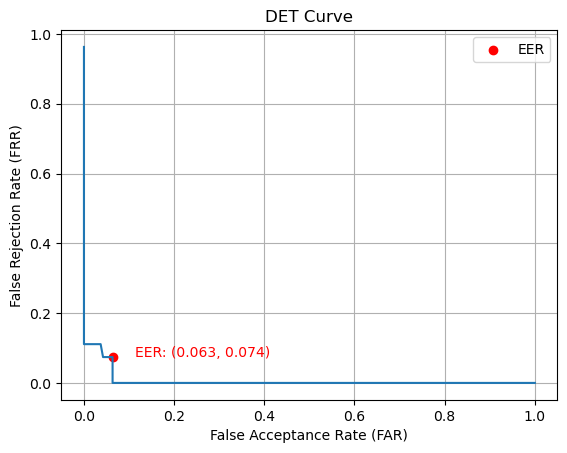

In [42]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_30_H_512:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


## d. GMM 1024:
### 3 seconds segments :

## Get the scores

In [43]:
results_3_H_1024 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_3_H.items():
    score = get_scores(test_segment, gmm_models_H_1024)
    results_3_H_1024.append((test_segment_name, score))

# Printing the results
for result in results_3_H_1024:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.3.1.mfcc ,Score: {'H1': -254.9455128536714, 'H2': -1779.4004374667102, 'H4': -1967.3304105280254, 'H5': -2401.224691047629, 'H6': -6945.124126034589, 'H7': -248.46870710627724, 'H8': -435.1525508256155, 'H9': -351.85186115493}
File: H1.3.10.mfcc ,Score: {'H1': -248.34987708286315, 'H2': -1878.520139726807, 'H4': -1778.5998703476396, 'H5': -2894.255715127051, 'H6': -6573.422243958287, 'H7': -260.4029726231362, 'H8': -435.97842287035024, 'H9': -365.3778918133486}
File: H1.3.11.mfcc ,Score: {'H1': -249.8298796979926, 'H2': -1716.315316053786, 'H4': -1773.3415404327855, 'H5': -2103.7773812348883, 'H6': -5800.367755316747, 'H7': -251.76475685276955, 'H8': -378.5032839064301, 'H9': -361.88820440510614}
File: H1.3.12.mfcc ,Score: {'H1': -269.1386287307665, 'H2': -1560.8243196526964, 'H4': -1837.1951879957473, 'H5': -2258.550843505436, 'H6': -5859.208130987787, 'H7': -266.0709438348245, 'H8': -374.2578135279123, 'H9': -360.3944843596961}
File: H1.3.13.mfcc ,Score: {'H1': -320.34067618

## Sort the scores

In [44]:
# Extract the scores from results_3_H_1024
scores = [score for _, score in results_3_H_1024]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the DET curve

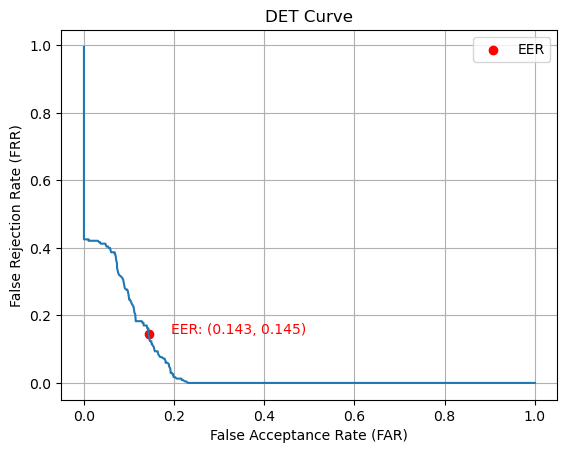

In [45]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_3_H_1024:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 10 seconds segments :

## Get the scores

In [46]:
results_10_H_1024 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_10_H.items():
    score = get_scores(test_segment, gmm_models_H_1024)
    results_10_H_1024.append((test_segment_name, score))

# Printing the results
for result in results_10_H_1024:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.10.1.mfcc ,Score: {'H1': -268.27736002778016, 'H2': -2006.9119980618304, 'H4': -1925.64891353645, 'H5': -2755.371772772512, 'H6': -6445.634422056672, 'H7': -265.58431259854814, 'H8': -472.6564674503726, 'H9': -365.0742644955468}
File: H1.10.2.mfcc ,Score: {'H1': -260.83839534280764, 'H2': -2049.701628966527, 'H4': -1688.9158426756132, 'H5': -2765.4694927438422, 'H6': -6075.612875250387, 'H7': -258.30156069688996, 'H8': -468.33833073987756, 'H9': -355.2923644412687}
File: H1.10.3.mfcc ,Score: {'H1': -248.70373448942618, 'H2': -1901.7538732711212, 'H4': -1851.3536616136234, 'H5': -2807.986660615069, 'H6': -6279.690297888171, 'H7': -253.41184621219233, 'H8': -441.0247282490826, 'H9': -382.26753533189475}
File: H1.10.4.mfcc ,Score: {'H1': -278.4542861621114, 'H2': -1563.7261339229606, 'H4': -2009.0039483921053, 'H5': -2765.2007192072506, 'H6': -5991.605799618423, 'H7': -257.0027569158869, 'H8': -359.5118059023755, 'H9': -372.5762073619833}
File: H1.10.5.mfcc ,Score: {'H1': -244.63

## Sort the scores

In [47]:
# Extract the scores from results_10_H_1024
scores = [score for _, score in results_10_H_1024]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


##  Plot the DET curve 

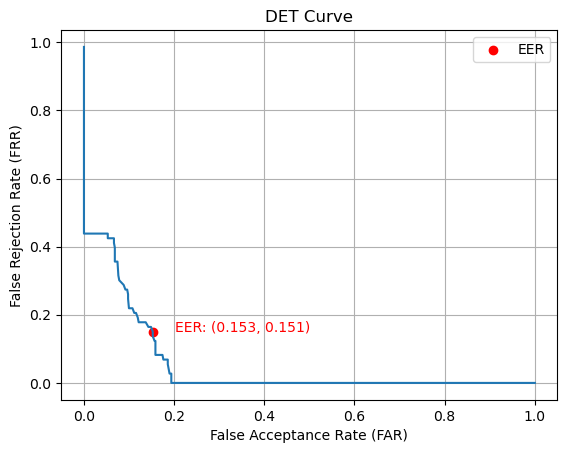

In [48]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_10_H_1024:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 15 seconds segments :

## Get the scores

In [49]:
results_15_H_1024 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_15_H.items():
    score = get_scores(test_segment, gmm_models_H_1024)
    results_15_H_1024.append((test_segment_name, score))

# Printing the results
for result in results_15_H_1024:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.15.1.mfcc ,Score: {'H1': -266.8417186505452, 'H2': -2007.5396192451958, 'H4': -1949.956215231009, 'H5': -2844.3685510244886, 'H6': -6399.158527172833, 'H7': -262.1823693164981, 'H8': -464.1659277950685, 'H9': -375.92581884471946}
File: H1.15.2.mfcc ,Score: {'H1': -251.7046079227975, 'H2': -1964.705380954457, 'H4': -1693.989396652782, 'H5': -2708.183399729793, 'H6': -6134.799869623989, 'H7': -256.0161103552555, 'H8': -457.18042316448657, 'H9': -359.1636240010874}
File: H1.15.3.mfcc ,Score: {'H1': -266.5455743026338, 'H2': -1643.7061856868118, 'H4': -1902.74405752297, 'H5': -2545.842615830106, 'H6': -5861.804066898781, 'H7': -254.9526590814295, 'H8': -370.78319842430824, 'H9': -348.1386698555098}
File: H1.15.4.mfcc ,Score: {'H1': -269.63005913246116, 'H2': -1842.1582764804439, 'H4': -1327.7941261863418, 'H5': -2686.557721982997, 'H6': -6595.553290019088, 'H7': -274.1819961239713, 'H8': -503.42686483459823, 'H9': -345.0095616999217}
File: H2.15.1.mfcc ,Score: {'H1': -514.30004589

## Sort the scores

In [50]:
# Extract the scores from results_15_H_1024
scores = [score for _, score in results_15_H_1024]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the DET curve

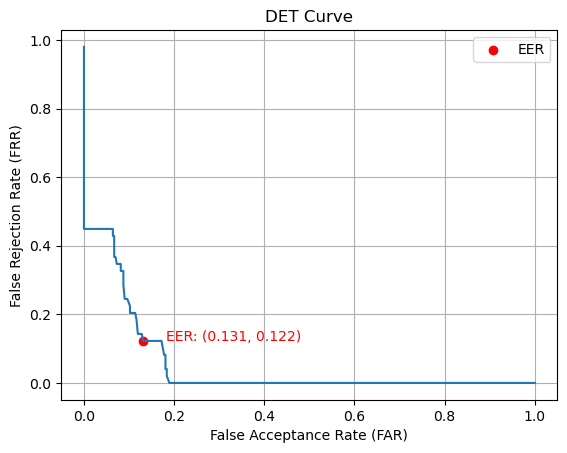

In [51]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_15_H_1024:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 30 seconds segments :

## Get the scores

In [52]:
results_30_H_1024 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_30_H.items():
    score = get_scores(test_segment, gmm_models_H_1024)
    results_30_H_1024.append((test_segment_name, score))

# Printing the results
for result in results_30_H_1024:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.30.1.mfcc ,Score: {'H1': -259.2731632866714, 'H2': -1986.1225000998263, 'H4': -1821.9728059418953, 'H5': -2776.275975377141, 'H6': -6266.97919839841, 'H7': -259.0992398358768, 'H8': -460.67317547977757, 'H9': -367.5447214229035}
File: H1.30.2.mfcc ,Score: {'H1': -267.5202883870251, 'H2': -1706.4181322987529, 'H4': -1721.05673311974, 'H5': -2590.3093593613203, 'H6': -6093.672836448426, 'H7': -261.02923480896317, 'H8': -412.69932283029596, 'H9': -347.1498545560011}
File: H2.30.1.mfcc ,Score: {'H1': -490.16857496477354, 'H2': -284.0869604693851, 'H4': -1491.411684245584, 'H5': -9401.607063760268, 'H6': -8121.235890295788, 'H7': -210.7714674366912, 'H8': -253.73128185758566, 'H9': -400.9737141807284}
File: H2.30.2.mfcc ,Score: {'H1': -476.3917630113694, 'H2': -311.969454476008, 'H4': -1483.9650409367082, 'H5': -9397.218741380693, 'H6': -8354.302312738733, 'H7': -211.42706068563479, 'H8': -257.3436551579554, 'H9': -390.17245335211163}
File: H4.30.1.mfcc ,Score: {'H1': -786.21852337

## Sort the scores

In [53]:
# Extract the scores from results_30_H_1024
scores = [score for _, score in results_30_H_1024]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot  the DET curve

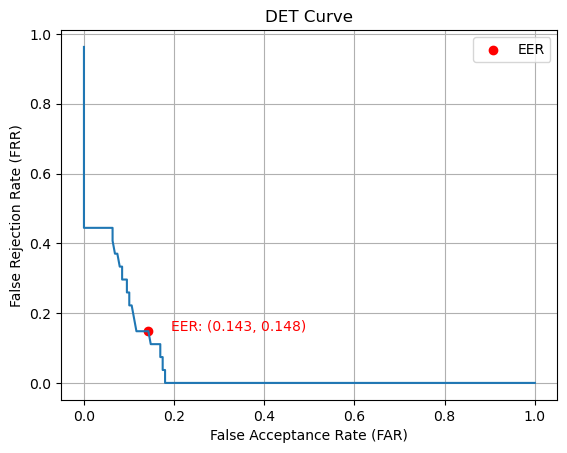

In [61]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_30_H_1024:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()
